<a href="https://colab.research.google.com/github/Dominika26/UMWF/blob/main/Smoczynska_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

In [3]:
movies = movies.join(movies['genres'].str.get_dummies('|'))

In [4]:
movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Podaj liczbę filmów Sci-Fi**

In [6]:
sci_fi_movies = (movies['Sci-Fi'] == 1).sum()
sci_fi_movies

980

Liczba filmów Sci-Fi wynosi 980.

**Pokaż rozkład ocen komedii**

In [7]:
merged_df = pd.merge(movies, ratings, on='movieId')
merged_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [8]:
comedies_ratings = merged_df[merged_df['Comedy'] == 1]

In [9]:
ratings = comedies_ratings['rating']

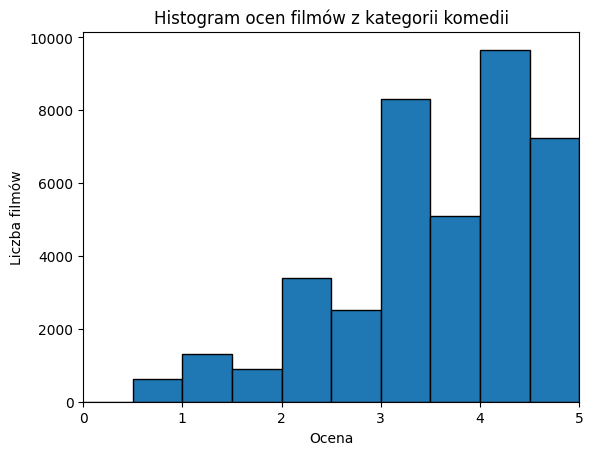

In [10]:
plt.hist(ratings, bins=[i/2 for i in range(11)], edgecolor='black')

# Dodaj tytuł i etykiety osi
plt.title('Histogram ocen filmów z kategorii komedii')
plt.xlabel('Ocena')
plt.ylabel('Liczba filmów')
plt.xlim(0, 5)

plt.show()

**Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej ocenianych - sprawdź czy dzilę przez liczbę recenzji tylko filmów akcji**

In [11]:
action_movies = merged_df[merged_df['Action'] == 1]
mean_rating_action_movies = action_movies['rating'].mean()

mean_rating_action_movies

3.447984331646809

In [12]:
grouped_action_movies = action_movies.groupby('movieId')

# Oblicz średnią ocenę i liczbę ocen dla każdego filmu akcji
action_movies_statistics = grouped_action_movies.agg({'rating': 'mean', 'movieId': 'count'})
action_movies_statistics.columns = ['mean_rating', 'ratings_number']

In [13]:
action_movies_statistics['ranking'] = (action_movies_statistics['mean_rating'] * action_movies_statistics['ratings_number']) /action_movies_statistics['ratings_number'].sum()
action_movies_statistics.sort_values(by='ranking', ascending=False)

,mean_rating,ratings_number,ranking
movieId,,,
2571,4.192446,278,0.038045
260,4.231076,251,0.034666
110,4.031646,237,0.031190
2959,4.272936,218,0.030406
480,3.750000,238,0.029133
...,...,...,...
53453,0.500000,1,0.000016
111785,0.500000,1,0.000016
134246,0.500000,1,0.000016


In [14]:
top_3_movies_titles = movies.loc[movies['movieId'].isin([2571, 260, 110])]['title']
top_3_movies_titles

97                              Braveheart (1995)
224     Star Wars: Episode IV - A New Hope (1977)
1939                           Matrix, The (1999)
Name: title, dtype: object

Średnia ocena filmów akcji wynosi około 3.45. Aby wyłonić najelepiej oceniane filmy akcji zastosowałam średnią ważoną aby uwzględnić nie tylko średnią ocenę filmu, ale także liczbę oddanych głosów. W ten sposób najlepsze 3 filmy akcji to *Braveheart*, *Star Wars: Episode IV - A New Hope* oraz *Matrix, The*.

**Zadanie 2 - systemy rekomendacyjne**

In [15]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162989 sha256=bcdb0e6e2b9b92805e8c2698e6fe1ca135464e16cdea889fb9d0cb104610361a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [16]:
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

In [17]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')

1. Zbuduj system na podstawie algorytmu SVD oraz kNNwithMeans

In [19]:
from surprise import KNNWithMeans

System rekomendacyjny z wykorzystaniem SVD

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
def svd_recommender(movie_id, n_factors, movies):

    min_rating = ratings.rating.min()
    max_rating = ratings.rating.max()
    reader = Reader(rating_scale=(min_rating, max_rating))

    data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
    trainset = data.build_full_trainset()

    algo = SVD(n_factors=n_factors)
    algo.fit(trainset)

    movie_inner_id = algo.trainset.to_inner_iid(movie_id)
    movie_vec = algo.qi[movie_inner_id]


    similarity_scores = []
    for item_id in range(algo.trainset.n_items):
        if item_id != movie_inner_id:
            item_vec = algo.qi[item_id]
            similarity_score = cosine_similarity([movie_vec], [item_vec])[0][0]
            similarity_scores.append((item_id, similarity_score))

    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    top_similar_movies = similarity_scores[:6]

    print("Podobne filmy:", movie_id)
    for id, score in top_similar_movies:
        raw_movie_id = algo.trainset.to_raw_iid(id)
        movie_title = movies.loc[movies['movieId'] == raw_movie_id, 'title'].values[0]
        print("Film ID:", raw_movie_id, "Podobieństwo:", score, "Tytuł:", movie_title)

In [79]:
svd_recommender(1, 2, movies)

Podobne filmy: 1
Film ID: 1303 Podobieństwo: 0.9999999331616465 Tytuł: Man Who Would Be King, The (1975)
Film ID: 84273 Podobieństwo: 0.9999997113912336 Tytuł: Zeitgeist: Moving Forward (2011)
Film ID: 34323 Podobieństwo: 0.9999995024857735 Tytuł: Devil's Rejects, The (2005)
Film ID: 6070 Podobieństwo: 0.9999992336859855 Tytuł: Tokyo Decadence (Topâzu) (1992)
Film ID: 1011 Podobieństwo: 0.9999991315582846 Tytuł: Herbie Rides Again (1974)
Film ID: 69275 Podobieństwo: 0.9999988879084051 Tytuł: Dead Snow (Død snø) (2009)


System rekomendacji KNNMeans

In [70]:
def kkn_with_means_recomennder(movie_id, k, movies):
    min_rating = ratings.rating.min()
    max_rating = ratings.rating.max()
    reader = Reader(rating_scale=(min_rating, max_rating))

    data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
    trainset = data.build_full_trainset()

    algo = KNNWithMeans(k=k)
    algo.fit(trainset)

    movie_inner_id = trainset.to_inner_iid(movie_id)
    movie_neighbors = algo.get_neighbors(movie_inner_id, k=5)
    similiar_movies_ids = [trainset.to_raw_iid(inner_id) for inner_id in movie_neighbors]

    # Wyświetl listę rekomendacji
    print("Podobne filmy:")
    for movie_id in similiar_movies_ids:
      movie_title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
      print("Film ID:", movie_id, "Tytuł:", movie_title)


In [73]:
kkn_with_means_recomennder(1, 10, movies)

Computing the msd similarity matrix...
Done computing similarity matrix.
Podobne filmy:
Film ID: 1219 Tytuł: Psycho (1960)
Film ID: 1265 Tytuł: Groundhog Day (1993)
Film ID: 106782 Tytuł: Wolf of Wall Street, The (2013)
Film ID: 72378 Tytuł: 2012 (2009)
Film ID: 87 Tytuł: Dunston Checks In (1996)


2. Czym różni się algorytm kNN with means od standardowego kNN?

W przeciwieństwie do standardowego kNN, kNN with means przy obliczaniu podobieństwa między sąsiadami uwzględnia średnie oceny każdego użytkownika.

W algortymie k-NNBasic ocena dla każdego użytkownika oraz przedmiotu (np. filmu) jest obliczana jako średnia ocen k najbardziej podobnych użytkowników lub przedmiotów, gdzie podobieństwo jest mierzone na podstawie podobieństwa między użytkownikami (lub przedmiotami). Natomiast w przypadku KNNWithMeans zamiast obliczać ocenę na podstawie surowych ocen algorytm najpierw oblicza różnicę między oceną użytkownika, a średnią oceną tego użytkownika (analogicznie dla przedmiotów), a następnie przewiduje ocenę dodając tę różnicę do średniej oceny najbardziej podobnych użytkowników (lub przedmiotów).

3. Wykorzystaj metodę hiperparametryzacji GridSearch do wyboru liczby sąsiadów od 2-6

In [22]:
param_grid_knn = {'k': [2, 3, 4, 5, 6]}
param_grid_svd = {'n_factors': [2, 3, 4, 5, 6]}

min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=5)
gs_svd.fit(data)

gs_knn = GridSearchCV(KNNWithMeans, param_grid_knn, measures=['rmse', 'mae'], cv=5)
gs_knn.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [24]:
print("SVD:", gs_svd.best_params['rmse'])
print("KNN with means:", gs_knn.best_params['rmse'])

SVD: {'n_factors': 3}
KNN with means: {'k': 6}


Dla SVD najlepsza liczba sąsiadów to 3, a dla KNN with means 6

In [25]:
cv_results_knn = cross_validate(gs_knn.best_estimator['rmse'], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cv_results_svd = cross_validate(gs_svd.best_estimator['rmse'], data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9187  0.9184  0.9202  0.9246  0.9188  0.9201  0.0023  
MAE (testset)     0.7059  0.7057  0.7044  0.7143  0.7059  0.7072  0.0036  
Fit time          0.13    0.16    0.17    0.16    0.17    0.16    0.02    
Test time         1.00    0.98    1.00    0.98    1.00    0.99    0.01    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8703  0.8625  0.8689  0.8684  0.8731  0.8687  0.

Niższe średnie RMSE i MAE ma algorytm SVD, którego ze względu na to wykorzystam do rekomendacji

Podaj rekomendacje po obejrzeniu filmu: Jumanji  oraz Flint

Rekomendacje dla filmu Jumanji

In [82]:
movies[movies['title'].str.contains('Jumanji')]

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
9636,179401,Jumanji: Welcome to the Jungle (2017),Action|Adventure|Children


In [83]:
svd_recommender(2, 3, movies)

Podobne filmy: 2
Film ID: 31700 Podobieństwo: 0.9993257724083962 Tytuł: Because of Winn-Dixie (2005)
Film ID: 5767 Podobieństwo: 0.9991865548168574 Tytuł: Teddy Bear (Mis) (1981)
Film ID: 3445 Podobieństwo: 0.9989556856230242 Tytuł: Eyes of Laura Mars (1978)
Film ID: 32657 Podobieństwo: 0.9986333679796794 Tytuł: Man Who Planted Trees, The (Homme qui plantait des arbres, L') (1987)
Film ID: 117531 Podobieństwo: 0.9985045785865277 Tytuł: Watermark (2014)
Film ID: 135288 Podobieństwo: 0.9982094976531987 Tytuł: Mr. Holmes (2015)


Rekomendacje dla filmu Flint

In [84]:
movies[movies['title'].str.contains('Flint')]

,movieId,title,genres
313,355,"Flintstones, The (1994)",Children|Comedy|Fantasy
2662,3564,"Flintstones in Viva Rock Vegas, The (2000)",Children|Comedy
3909,5493,In Like Flint (1967),Action|Adventure|Comedy
3910,5497,Our Man Flint (1965),Adventure|Comedy|Sci-Fi
8717,126088,A Flintstones Christmas Carol (1994),Animation|Children|Comedy
9739,193585,Flint (2017),Drama


In [85]:
svd_recommender(193585, 3, movies)

Podobne filmy: 193585
Film ID: 1986 Podobieństwo: 0.9998765793203449 Tytuł: Halloween 5: The Revenge of Michael Myers (1989)
Film ID: 7208 Podobieństwo: 0.999707266156454 Tytuł: Dr. Jekyll and Mr. Hyde (1941)
Film ID: 1306 Podobieństwo: 0.9996991745186579 Tytuł: Until the End of the World (Bis ans Ende der Welt) (1991)
Film ID: 2175 Podobieństwo: 0.9994397893047577 Tytuł: Déjà Vu (1997)
Film ID: 9005 Podobieństwo: 0.9992651119880582 Tytuł: Fire in the Sky (1993)
Film ID: 164655 Podobieństwo: 0.999048465298622 Tytuł: Gimme Danger (2016)
